In [1]:
import pandas as pd
import itertools

# **ALGORITHMIC QUESTION**

## **Problem modeling**

* To solve the problem, we label the nodes of the $\quad 3 \times 3 \quad$ grid with the integers from $1$ to $9$ , as shown in the figure below.

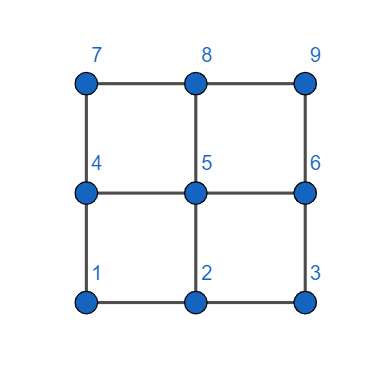

In [6]:
from IPython.display import Image
Image("C:/Users/wiwis/OneDrive/Desktop/ADM/5°HW/grafo_password.png")

<center><img src="grafo_password.png" /></center>


* From the exercise description as input we have a string that read from left to right ,via individual letters, describes the direction ( **R**, **L**, **U**, and **D** ) of each line segment of a path through the grid, without giving any information about the length of these segments. <br> To better schematize the problem from now on the following notation will be considered :
   + `'r'`,`'l'`,`'u'`, and `'d'` correspond to a movement of a single segment to the Right, Left, Up, and Down directions;
   + `'R'`,`'L'`,`'U'`, and `'D'` correspond to a movement of two segment to the Right, Left, Up, and Down directions.

* Now in a dataframe we enter the information about the connections between the various nodes by indexing the rows with their labels and indicating the possible movements in the columns, taking into account the notation just fixed.

In [2]:
nodes_connections= pd.DataFrame(index=[i for i in range(1,10)],columns=['r','R','l','L','u','U','d','D'])

nodes_connections.loc[1] = pd.Series([2,3,1,1,4,7,1,1],index=['r','R','l','L','u','U','d','D'])
nodes_connections.loc[2] = pd.Series([3,2,1,2,5,8,2,2],index=['r','R','l','L','u','U','d','D'])
nodes_connections.loc[3] = pd.Series([3,3,2,1,6,9,3,3],index=['r','R','l','L','u','U','d','D'])
nodes_connections.loc[4] = pd.Series([5,6,4,4,7,4,1,4],index=['r','R','l','L','u','U','d','D'])
nodes_connections.loc[5] = pd.Series([6,5,4,5,8,5,2,5],index=['r','R','l','L','u','U','d','D'])
nodes_connections.loc[6] = pd.Series([6,6,5,4,9,6,3,6],index=['r','R','l','L','u','U','d','D'])
nodes_connections.loc[7] = pd.Series([8,9,7,7,7,7,4,1],index=['r','R','l','L','u','U','d','D'])
nodes_connections.loc[8] = pd.Series([9,8,7,8,8,8,5,2],index=['r','R','l','L','u','U','d','D'])
nodes_connections.loc[9] = pd.Series([9,9,8,7,9,9,6,3],index=['r','R','l','L','u','U','d','D'])

nodes_connections

,r,R,l,L,u,U,d,D
1,2,3,1,1,4,7,1,1
2,3,2,1,2,5,8,2,2
3,3,3,2,1,6,9,3,3
4,5,6,4,4,7,4,1,4
5,6,5,4,5,8,5,2,5
6,6,6,5,4,9,6,3,6
7,8,9,7,7,7,7,4,1
8,9,8,7,8,8,8,5,2
9,9,9,8,7,9,9,6,3


* For example, if we condider the entry relative to node $1$ and at column `'r'` we observe the value $2$ relative to the node of the same name, which in fact can be reached from node $1$ with a single movement to the right. <br> If from a node a paricular move is not possible in the corresponding entry the label of the node in question is inserted, as noted for the entries of node $1$ corresponding to the columns `'l'`,`'L'`,`'d'` and `'D'`.

## **Solution**

* The below `Password` function represents an implementation to solve the problem, as input it requires the dataframe  related to the connections `nodes_connections` and the string that tracks the directions of the movements `input_movements` while as output it returns an integer corresponding to the number of possible patterns . Is structured as follows:<br><br>
    + before any calculation, if the length of `input_movements` is greater than 8=*(number of nodes -1)* the process stops and 0 is returned. In fact considering the conditions ,specified in the text of the exercise, that the poly-lines under consideration, constructed via `input_movements`, must satisfy they cannot consist of more than *(number of nodes -1)* segments;<br><br> 
    + all the possible paths that `input_movements` can represent are collected in the list `possible_path` as tuples.<br> For example if `input_movements` = 'DRU' we have: <br>
    `possible_path`= \[('d', 'r', 'u'), ('d', 'r', 'U'), ('d', 'R', 'u'), ('d', 'R', 'U'), ('D', 'r', 'u'), ('D', 'r', 'U'), ('D', 'R', 'u'), ('D', 'R', 'U' \];<br><br>
    + **ALGORITHM CORE** - considering the single path `path` among those found, in the $j$-$th$ entry of the list `nodes_visited` we keep updated the set of nodes that we meet using `path` assuming the $(j+1)$-$th$ node as starting point, once the path is finished if the length of this set coincides with the *(length of `path` +1)* we increase the counter of possible patterns by one, in fact for a pattern related to `path` to be consistent with the problem it must be such as to encounter *(length of `path` +1)* distinct nodes.


In [3]:
def Password(nodes_connections,input_movements):
    
    # SUPPORT VARIABLES INITIALIZATION
    number_nodes = nodes_connections.shape[0] 
    lenght_path = len(input_movements)
    possible_decision = []    
    count_path = 0
    
    # CHECK ON THE CONSISTENCY OF 'input_movements'
    if lenght_path > (number_nodes-1):    
         return 0    
    
    # ALL POSSIBLE PATHS ARE FOUND
    for movement in input_movements:
         possible_decision.append((movement.lower(),movement))
    possible_path = list(itertools.product(*possible_decision))

    # WE CONTROL THE PATHS INIDVIDUALLY
    for path in possible_path:
        
        #ALGORITHM CORE APPLIED TO ALL NODES SIMULTANEOUSLY
        nodes_visited = [ set([i]) for i in range(1,number_nodes+1) ]
        current_positions  = [ i for i in range(1,number_nodes+1) ]

        for movement in path:
            
            for j in range(number_nodes):
                
                movement_node_j = nodes_connections.loc[current_positions[j], movement]
                current_positions[j] = movement_node_j
                nodes_visited[j].add(movement_node_j)
            
            count_path += [ len(p) for p in nodes_visited ].count(lenght_path+1)            

    return count_path    

## **Testing**

* Let us now test the algorithm with the three example inputs given in the exercise trace:

In [4]:
input_1 = 'DRU'
input_2 = 'R'
input_3 = 'LDRDRUL'

In [5]:
print('The possible pattern encoded by the direction string \''+input_1+'\' are: '+str(Password(nodes_connections,input_1)))
print('The possible pattern encoded by the direction string \''+input_2+'\' are: '+str(Password(nodes_connections,input_2)))
print('The possible pattern encoded by the direction string \''+input_3+'\' are: '+str(Password(nodes_connections,input_3)))

The possible pattern encoded by the direction string 'DRU' are: 15
The possible pattern encoded by the direction string 'R' are: 9
The possible pattern encoded by the direction string 'LDRDRUL' are: 0


* all results are correct.